In [44]:
import pandas_datareader as pdr

In [45]:
key="393531f937a17a6d060f734ec13082e7ed80c6c4"

In [46]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.7/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [47]:
df.to_csv('AAPL.csv')

In [48]:
import pandas as pd

In [49]:
df=pd.read_csv('AAPL.csv')

In [50]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2017-04-19 00:00:00+00:00,140.68,142.00,140.45,141.88,17328375,33.201018,33.512543,33.146737,33.484223,69313500,0.0,1.0
1,AAPL,2017-04-20 00:00:00+00:00,142.44,142.92,141.16,141.22,23319562,33.616385,33.729667,33.314300,33.328460,93278248,0.0,1.0
2,AAPL,2017-04-21 00:00:00+00:00,142.27,142.68,141.85,142.44,17320928,33.576264,33.673026,33.477143,33.616385,69283712,0.0,1.0
3,AAPL,2017-04-24 00:00:00+00:00,143.64,143.95,143.18,143.50,17116599,33.899590,33.972751,33.791028,33.866549,68466396,0.0,1.0
4,AAPL,2017-04-25 00:00:00+00:00,144.53,144.90,143.87,143.91,18216472,34.109633,34.196954,33.953870,33.963311,72865888,0.0,1.0


In [51]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2022-04-08 00:00:00+00:00,170.09,171.78,169.20,171.78,76575508,170.09,171.78,169.20,171.78,76575508,0.0,1.0
1254,AAPL,2022-04-11 00:00:00+00:00,165.75,169.03,165.50,168.71,72246706,165.75,169.03,165.50,168.71,72246706,0.0,1.0
1255,AAPL,2022-04-12 00:00:00+00:00,167.66,169.87,166.64,168.02,79265181,167.66,169.87,166.64,168.02,79265181,0.0,1.0
1256,AAPL,2022-04-13 00:00:00+00:00,170.40,171.04,166.77,167.39,70618925,170.40,171.04,166.77,167.39,70618925,0.0,1.0
1257,AAPL,2022-04-14 00:00:00+00:00,165.29,171.27,165.04,170.62,75329376,165.29,171.27,165.04,170.62,75329376,0.0,1.0


In [52]:
df1=df.reset_index()['close']
df1

0       140.68
1       142.44
2       142.27
3       143.64
4       144.53
         ...  
1253    170.09
1254    165.75
1255    167.66
1256    170.40
1257    165.29
Name: close, Length: 1258, dtype: float64

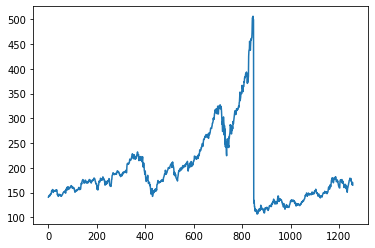

In [53]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [54]:
import numpy as np

In [55]:
df1


0       140.68
1       142.44
2       142.27
3       143.64
4       144.53
         ...  
1253    170.09
1254    165.75
1255    167.66
1256    170.40
1257    165.29
Name: close, Length: 1258, dtype: float64

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [57]:
print(df1)

[[0.08475892]
 [0.08916719]
 [0.08874139]
 ...
 [0.15233563]
 [0.1591985 ]
 [0.1463995 ]]


In [58]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [59]:
train_data

array([[0.08475892],
       [0.08916719],
       [0.08874139],
       [0.09217282],
       [0.094402  ],
       [0.09227301],
       [0.09254853],
       [0.09219787],
       [0.09953663],
       [0.101866  ],
       [0.10073889],
       [0.0994114 ],
       [0.10549781],
       [0.11564183],
       [0.11809643],
       [0.116268  ],
       [0.11799624],
       [0.12338134],
       [0.12237946],
       [0.12180338],
       [0.10872887],
       [0.11446462],
       [0.11576706],
       [0.11809643],
       [0.11762054],
       [0.11646838],
       [0.11779587],
       [0.11714465],
       [0.11729493],
       [0.11501565],
       [0.11606763],
       [0.12175329],
       [0.11794615],
       [0.11924859],
       [0.12155291],
       [0.12060113],
       [0.1055479 ],
       [0.09663118],
       [0.09956168],
       [0.09597996],
       [0.09380088],
       [0.08874139],
       [0.0989355 ],
       [0.09560426],
       [0.0977583 ],
       [0.09715717],
       [0.09878522],
       [0.097

In [60]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [61]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [62]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [63]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [64]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [66]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
12/12 [==============================] - 3s 207ms/step - loss: 2.8381e-04 - val_loss: 1.5085e-04
Epoch 2/300
12/12 [==============================] - 2s 158ms/step - loss: 2.8194e-04 - val_loss: 1.5145e-04
Epoch 3/300
12/12 [==============================] - 2s 157ms/step - loss: 3.3363e-04 - val_loss: 1.2686e-04
Epoch 4/300
12/12 [==============================] - 2s 153ms/step - loss: 2.9448e-04 - val_loss: 1.6539e-04
Epoch 5/300
12/12 [==============================] - 2s 156ms/step - loss: 2.8588e-04 - val_loss: 1.1922e-04
Epoch 6/300
12/12 [==============================] - 2s 154ms/step - loss: 2.7982e-04 - val_loss: 1.5349e-04
Epoch 7/300
12/12 [==============================] - 2s 153ms/step - loss: 2.7516e-04 - val_loss: 1.1672e-04
Epoch 8/300
12/12 [==============================] - 2s 152ms/step - loss: 2.5702e-04 - val_loss: 1.3770e-04
Epoch 9/300
12/12 [==============================] - 2s 152ms/step - loss: 2.6036e-04 - val_loss: 1.1972e-04
Epoch 10/300
12/12 

In [87]:
import tensorflow as tf

In [88]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [89]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [90]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

221.32106255187267

In [91]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

147.40671238551616

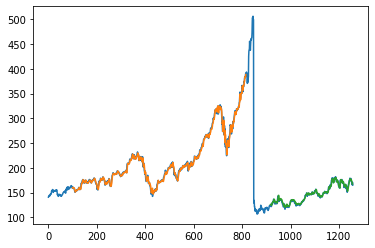

In [92]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [93]:
len(test_data)

441

In [94]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [95]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [96]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.15177321]
101
1 day input [0.13668128 0.13800877 0.12515967 0.13375078 0.14642455 0.14509706
 0.14256731 0.1377583  0.14647464 0.16115216 0.17092048 0.16961803
 0.181866   0.17257358 0.16904195 0.18149029 0.16385723 0.16105197
 0.15757044 0.16568566 0.17232311 0.17392611 0.18407013 0.18146525
 0.18169067 0.17873513 0.17715717 0.18827802 0.18249217 0.17051972
 0.16320601 0.16363181 0.1636819  0.17092048 0.17204759 0.1636819
 0.16588604 0.15769568 0.14875391 0.14444584 0.13918597 0.13720726
 0.13259862 0.1323732  0.13119599 0.15902317 0.17016907 0.16974327
 0.17282405 0.16546024 0.16418284 0.16235441 0.1702943  0.17392611
 0.16350657 0.15479023 0.15539136 0.16518472 0.16458359 0.15539136
 0.15143394 0.14396994 0.13332498 0.14001252 0.14529743 0.1459737
 0.14116468 0.14958046 0.14875391 0.14108954 0.13139637 0.12673763
 0.14053851 0.12944271 0.11994991 0.1096556  0.1208516  0.13212273
 0.13470257 0.14311835 0.14662492 0.15524108 0.1587226  0.16839073
 0.17001879 0.17222292 0.1806387  0

In [97]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [98]:
import matplotlib.pyplot as plt

In [99]:
len(df1)

1258

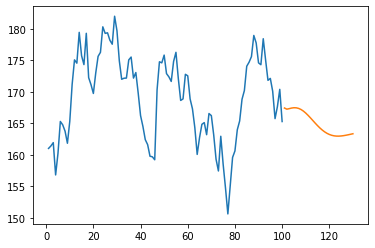

In [100]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

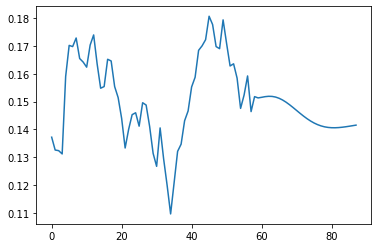

In [101]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [102]:
df3=scaler.inverse_transform(df3).tolist()

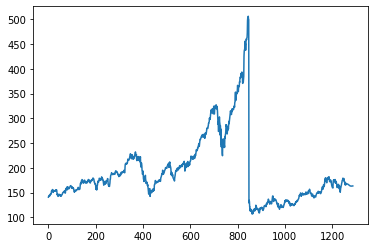

In [103]:
plt.plot(df3)